# Traffic jam warning system

Imagine, you want to implement a Bayesian traffic jam warning system. In traffic jams, there are slow vehicles. You have two detection systems, to detect slow vehicles, a camera based and a radar based detection system. From each system you get a binary value (no traffic, traffic jam) and a confidence value (in percent), which indicates, how certain the detection is.

The diagram shows a Bayes Net with random variables for "Traffic" jam, "Slow" vehicle, "Camera" detection, "Radar" detection, with their corresponding CPDs (factors).
The joint probability factorizes in:

$$ P(Traffic, Slow, Camera, Radar) = P(Traffic) * P(Slow|Traffic) * P(Camera|Slow) * P(Radar|Slow) $$ <br>

According to the detections, we can set the evidence for camera and radar to "true" or "false".
For example, if both detection systems detected a slow vehicle:

$$ P(Traffic, Slow | Camera=true, Radar=true) = P(Traffic) * P(Slow|Traffic) * P(Camera=true|Slow) * P(Radar=true|Slow) $$ <br>

Marginalizing (summing out) "Slow", "Camera" and "Radar" gives the marginal posterior probability for "Traffic" jam:

$$ P(Traffic | Camera=true, Radar=true) = \sum_{Slow, Camera, Radar} P(Traffic) * P(Slow|Traffic) * P(Camera=true|Slow) * P(Radar=true|Slow) $$ <br>

![](traffic_jam.svg)


Instructions:

1. Run the C++ target "TrafficJam_Variable_Elimination". This will store the calculated data in csv files.<br> 
   Before you run it, adapt the path for the data output in traffic_jam_variable_elimination.cpp
2. To evaluate the results, read in the data file in python (see below) and create the plots. <br>
   Don't forget to set the path to the data in the below cell to the same path as in the C++ target.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import fnmatch

cwd = os.getcwd()
data_path = cwd

def find_files(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

def show_plot(file_path_and_name):
    data = np.genfromtxt(file_path_and_name, delimiter=',', skip_header=1)

    x = range(len(data)) 

    plt.plot(x, data[:,0], 'r-', label='P(Camera|Slow)')
    plt.plot(x, data[:,1], 'g-', label='P(Radar|Slow)')
    plt.plot(x, data[:,2], 'b-', label='P(Traffic|Camera,Radar)')

    plt.legend(loc='best')
    plt.show()

## Time series with a static Bayes Net
At each time point, we get a detection (true/false) and a confidence value (0...100%) from each detection system.
We use the Bayes Net above for all time points. In a "static" Bayes Net, there are no connections between random variables at different time points.

In the plot below, we have data for 80 time points. For all time points both detection systems (camera, radar) are true, but the confidence values differ.
We see that, even if the detection systems are very certain about their detections at the end (both 100%), the probability for traffic jam given the detections does not exceed 50%.

This is due to the low prior probability of a traffic jam (0.01), cf. the often cited disease test example in statistics. For a good explanation of this phenomen see https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/



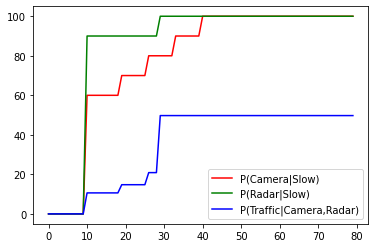

In [2]:
show_plot(data_path + os.sep + 'traffic.csv')

## Time series with Dynamic Bayes Net (DBN)
In a DBN, there are connections between random variables at different time points ('persistent' variables). A DBN consist of 2 BNs. A first BN at time 0 for initialisation, and a second BN that is repeated. The first BN for initialization is identical to the static BN above. It has no connections to other time points. The second BN has interface variables for the last time point and transition models for the persistent variables.

![](traffic_jam_dbn.svg)

Now let's see how the plots change when using a Dynamic Base Net on the data.
Plots for different transition probabilities $ P(Traffic_t) | Traffic_{t-1}) $ => 0.5, 0.75, 0.95

We see that the probability of traffic jam given the detections is now much higher (>90%). This is due to the fact, that with a DBN, we know something about the past.
Whith the transition probability we can control how smooth the filtered value for traffic jam is.

c:\BayesNet\examples\traffic_jam\traffic_dbn_0.500000.csv


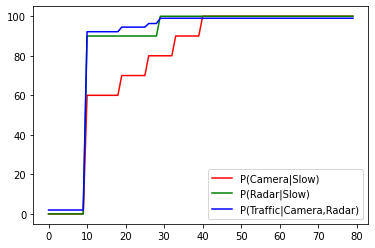

c:\BayesNet\examples\traffic_jam\traffic_dbn_0.750000.csv


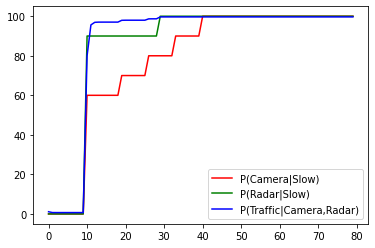

c:\BayesNet\examples\traffic_jam\traffic_dbn_0.950000.csv


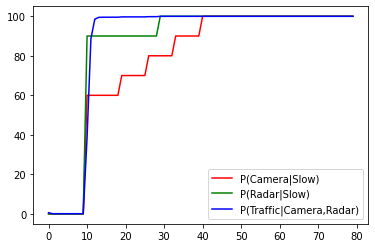

In [3]:
files = find_files('traffic_dbn*', data_path)

for f in files:
    print(f)
    show_plot(f)